About Dataset

The The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not.

Source: <a href="https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets">Bank Dataset - Marketing Targets</a>

| Columns | Description | Type | Remarks |
| :- | :- | :- | :- |
| age | numeric | bank client data | |
| job | type of job | bank client data | |
| marital | marital status | bank client data | |
| education | education tier | bank client data | |
| default | has credit in default? | bank client data | |
| balance | average yearly balance, in euros | bank client data | |
| housing | has housing loan? | bank client data | |
| loan | has personal loan? | bank client data | |
| contact | contact communication type | related with last contact of the current campaign | |
| day | last contact day of the month | related with last contact of the current campaign | |
| month | last contact month of year | related with last contact of the current campaign | |
| duration | last contact duration, in seconds | related with last contact of the current campaign | |
| campaign | number of contacts performed during this campaign and for this client | others | |
| previous | number of contacts performed before this campaign and for this client | others | | 
| pdays | number of days that passed by after the client was last contacted from a previous campaign | others | pdays = -1 means client was not previously contacted (previous = 0) | |
| poutcome | outcome of the previous marketing campaign | others | |
| y | has the target subscribed a term deposit? | target variable | |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats

In [2]:
import pandas as pd
#load the CSV file
df = pd.read_csv(r'Banking Marketing Targets.csv')
print ('Number of samples: ',len(df))

Number of samples:  49732


In [3]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [4]:
df.shape

(49732, 17)

**Descriptive Analysis**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


Nama kolom dan tipe data sudah sesuai, 

In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Tidak terdapat nilai kosong (NaN) pada dataset ini.

In [7]:
#Negative Balanced

df[(df['balance'] < 0) & (df['poutcome'] != 'unknown')].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24416,43,technician,divorced,secondary,no,-36,yes,no,cellular,17,nov,190,1,104,1,failure,no
24528,43,blue-collar,divorced,secondary,no,-259,no,no,cellular,17,nov,732,1,171,2,other,no
24536,42,technician,single,secondary,no,-15,no,no,cellular,17,nov,89,1,145,1,failure,no
24589,37,services,married,secondary,yes,-954,yes,no,cellular,17,nov,69,1,180,3,failure,no


Terdapat nilai negatif pada kolom balance.

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Standar deviasi pada semua kolom numerik >1 artinya terdapat rentang variasi data yang lebar.

In [9]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,10678,30011,25508,48841,27689,41797,32181,15164,40664,43922


Pada kolom job dan month terdapat nilai kategorik yang cukup banyak, sehingga pada tahap data pre-processing perlu dilakukan feature encoding dengan metode One-hots encoding.

In [10]:
num_dtypes = ['int16', 'int32', 'int64', 'float', 'float16', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include = num_dtypes)
numerical = num_df.columns

cat_dtypes = ['object']
cat_df = df.select_dtypes(include = cat_dtypes)
categorical = cat_df.columns

print(numerical)
print(categorical)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [11]:
for col in categorical:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom job:
blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: job, dtype: int64

Value count kolom marital:
married     30011
single      13986
divorced     5735
Name: marital, dtype: int64

Value count kolom education:
secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: education, dtype: int64

Value count kolom default:
no     48841
yes      891
Name: default, dtype: int64

Value count kolom housing:
yes    27689
no     22043
Name: housing, dtype: int64

Value count kolom loan:
no     41797
yes     7935
Name: loan, dtype: int64

Value count kolom contact:
cellular     32181
unknown      14344
telephone     3207
Name: contact, dtype: int64

Value count kolom month:
may    15164
jul     7601
aug     6880
jun     5872


In [12]:
df['y'].value_counts(normalize=True)

no     0.883174
yes    0.116826
Name: y, dtype: float64

- Fitur target memiliki 2 outcome (yes/no),
- Adanya imbalance yang nanti bisa dilakukan oversampling/undersampling,

**Univariate Analysis**

**a. Displot (Numerical)**

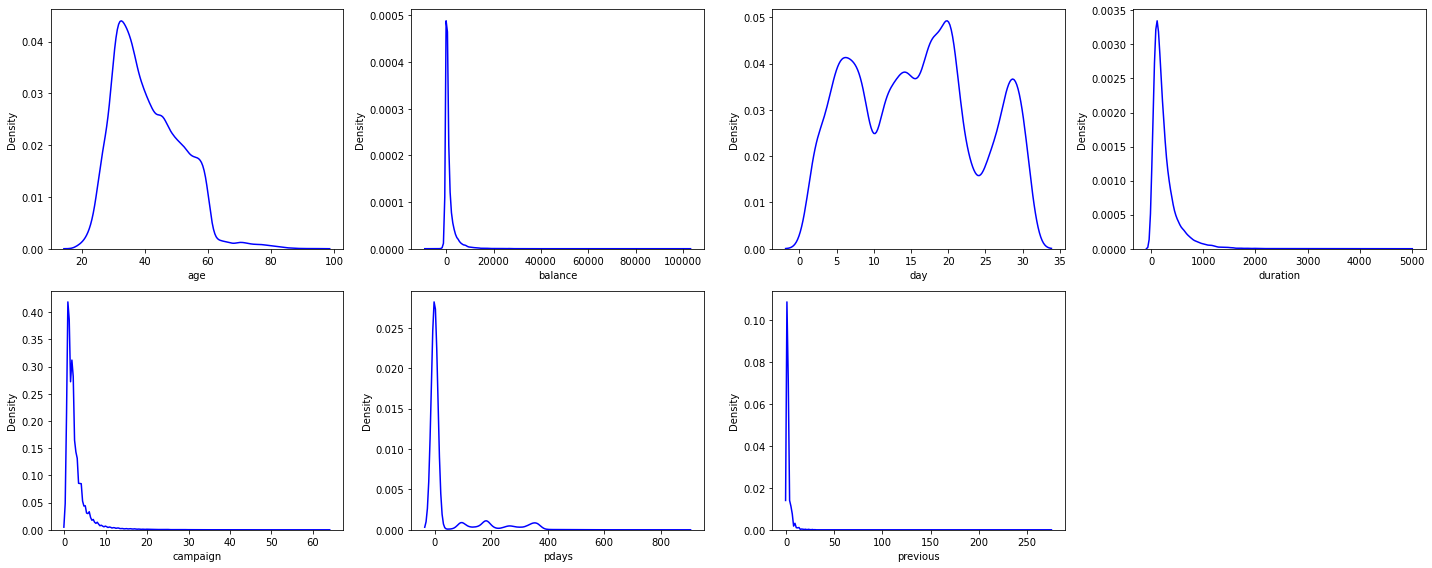

In [13]:
features_num = numerical
plt.figure(figsize=(20,8))
for i in range(0, len(numerical)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features_num[i]], color = 'blue')
    plt.tight_layout()

*Insight Displot :*
Terdapat beberapa fitur yang tidak terdistribusi normal dan cenderung right-skewed (right long tailed). Fitur age, duration, campaign dan pdays perlu dilakukan log transfrmation agar lebih mendekati distribusi normal.

**b. Histogram (Numerical)**

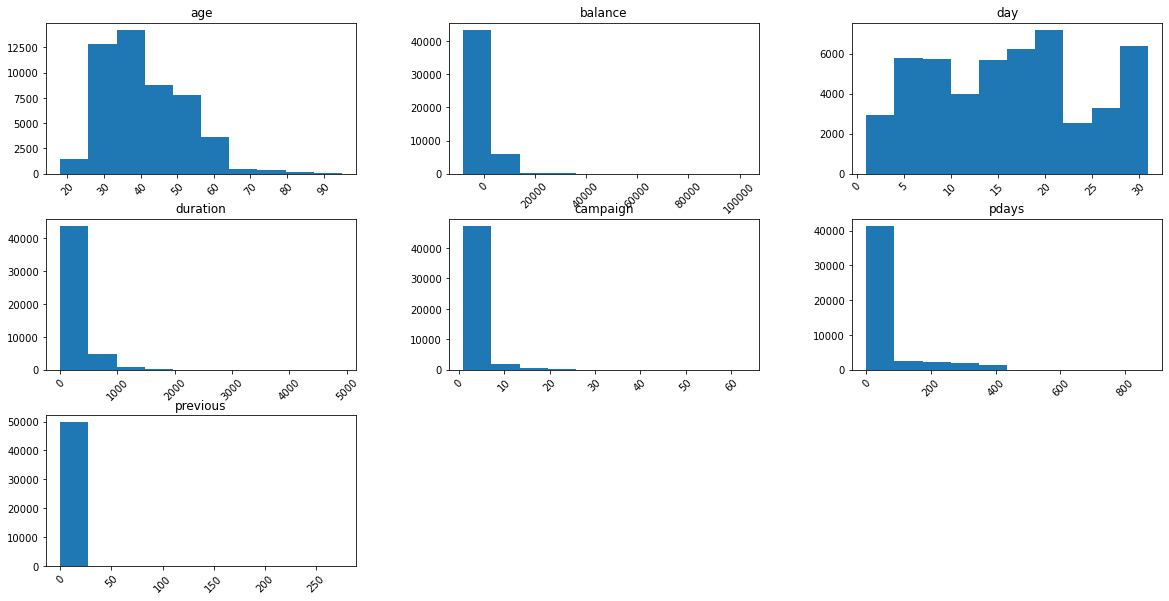

In [14]:
df.hist(figsize=(20,10), xrot=45, grid=False)
plt.show()

*Insight Histogram :*
Pada plot histogram lebih terlihat jelas melaui bin pada masing-masing fitur, tidak terdistribusi normal dan cenderung right-skewed (right long tailed). Fitur age, duration, campaign dan pdays perlu dilakukan log transfrmation agar lebih mendekati distribusi normal.

**c. Boxplot (Numerical)**

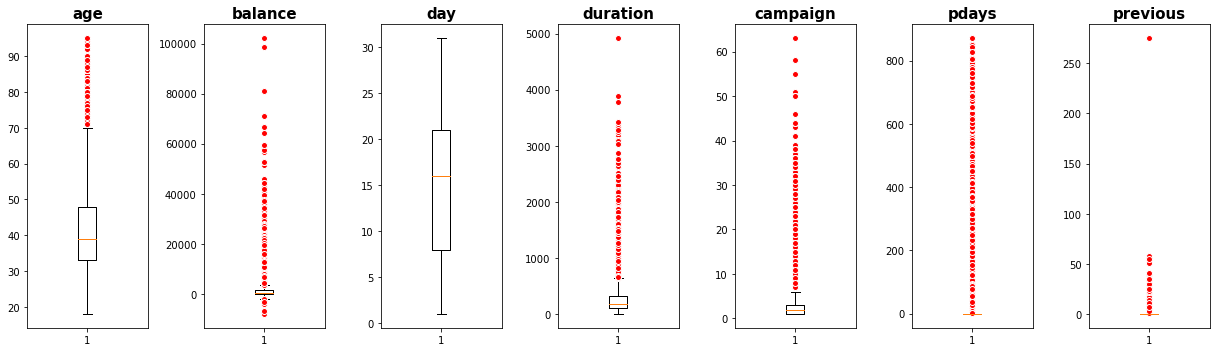

In [18]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(numerical), figsize=(17,5))

for i, ax in enumerate(axs.flat):
  ax.boxplot(df[numerical].iloc[:,i], flierprops=red_circle)
  ax.set_title(df[numerical].columns[i], fontsize=15, fontweight='bold')
  ax.tick_params(axis='y', labelsize=10)    
plt.tight_layout()

*Insight Boxplot :*
Pada grafik boxplot, terlihat beberapa fitur yang memiliki outlier, yaitu nilai ekstrem yang melewati nilai limit tertinggi dan terendah dari suatu fitur. Pada fitur age, balance, duration, campaign, pdays dan previous memiliki outlier, nantinya outlier perlu dilakukan penanganan melalui z-score.

**d. Violin Plot**

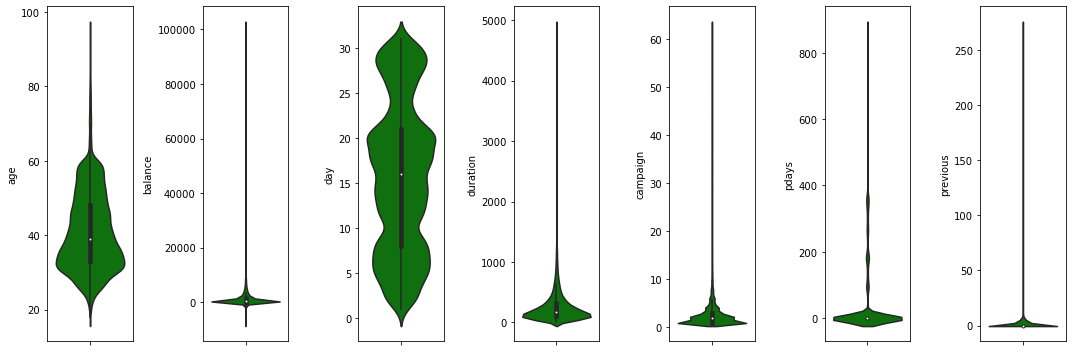

In [19]:
plt.figure(figsize=(15, 5))
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.violinplot(y=df[numerical[i]], color='green', orient='v')
    plt.tight_layout()

**e. Barplot (Categorical)**

<Figure size 1080x864 with 0 Axes>

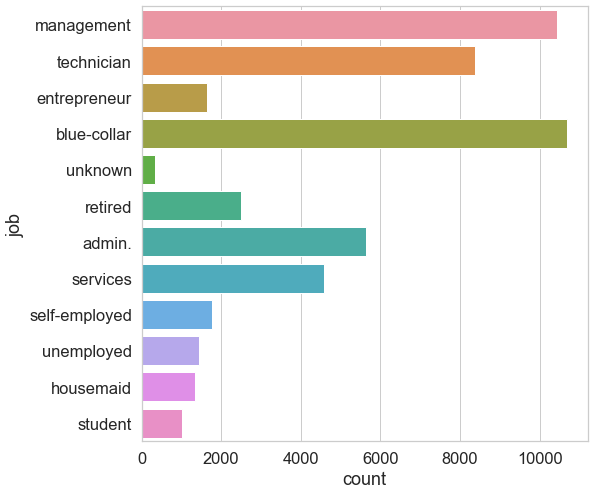

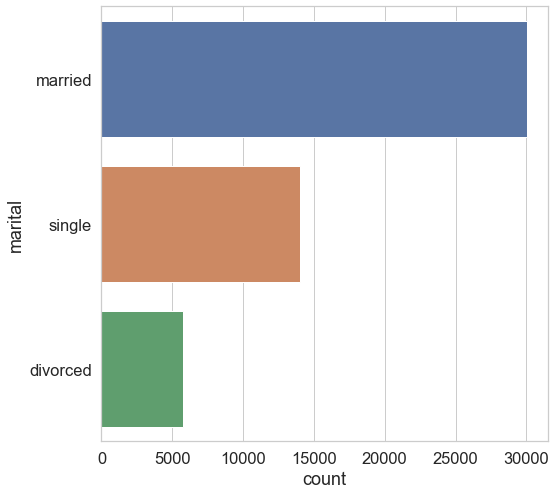

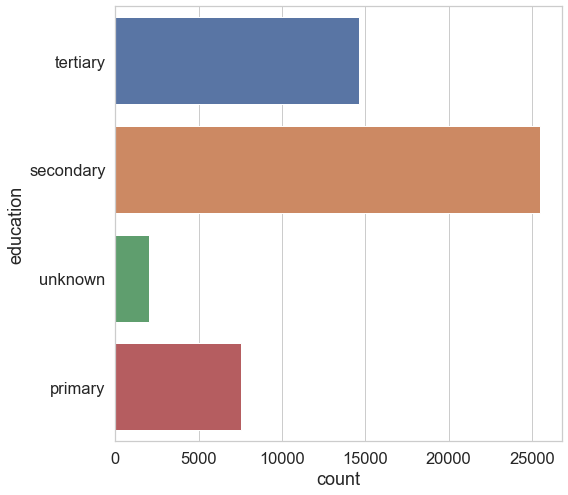

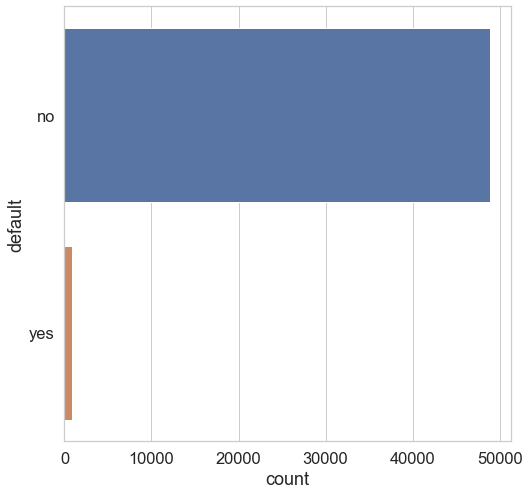

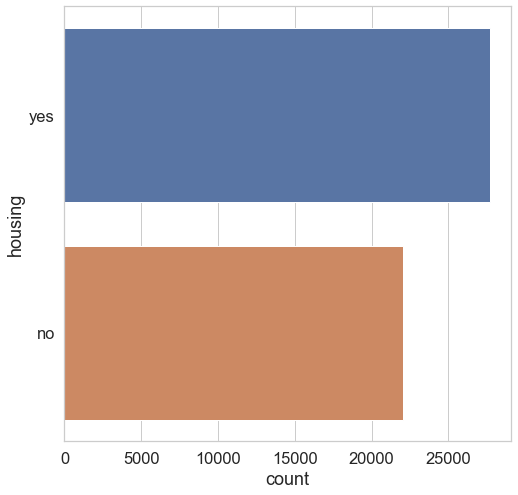

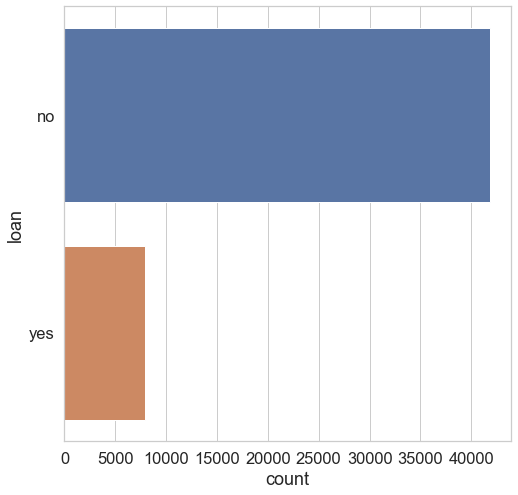

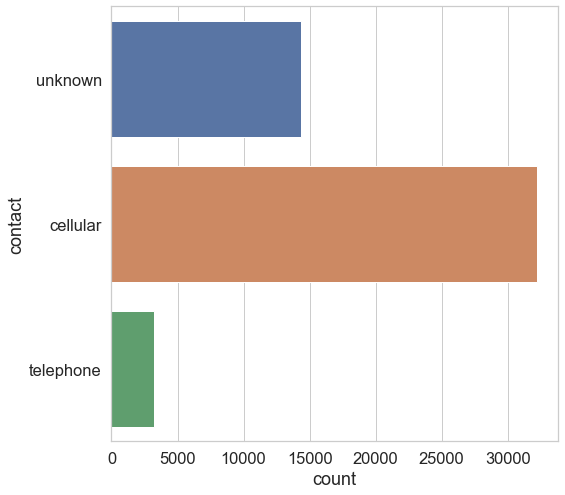

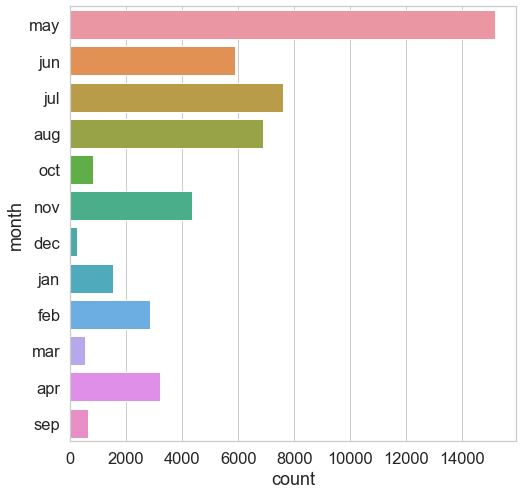

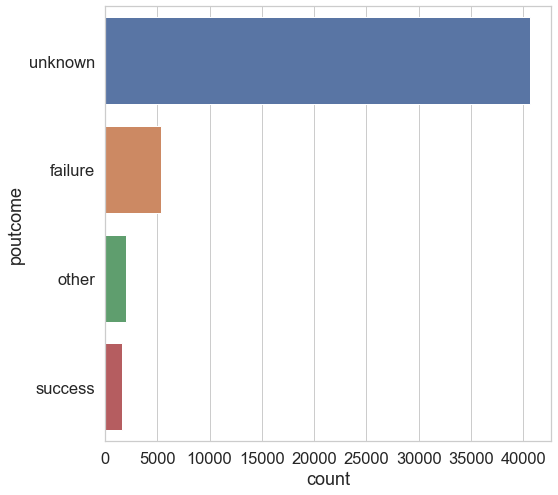

In [44]:
plt.figure(figsize=(15, 12))
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 16:
        fig, ax =plt.subplots(1,1)
        sns.countplot(y=column, data=df)
        plt.show()

*Insight Barplot :*

**- Grafik Job**

Pekerjaan blue-collar, manajemen dan technician merupakan pekerjaan yang paling banyak pada nasabah bank. Sedangkan pekerjaan unknown, ART dan pelajar adalah pekerjaan paling sedikit pada nasabah bank.

**- Grafik Marital**

Pada status pernikah, nasabah yang berstatus menikah merupakah nasabah terbanyak, diikuti oleh nasabah yang berstatus belum menikah.

**- Grafik Education**

Tingkat pendidikan secondary (SMP) merupakah tingkat pendidikan paling dominan yang dimiliki nasabah bank.

**- Grafik Housing**

Pada dataset kampanye produk deposito, nasabah yang pernah melakukan pinjaman untuk perumahan lebih banyak daripada yang tidak pernah melakukan pinjaman perumahan.

**- Grafik Loan**

Nasabah yang tidak melakukan pinjaman uang lebih banyak daripada pernah melakukan pinjaman.

**- Grafik Contact**

Nasabah paling banyak dihubungi melalui telepon seluler (HP), sedangkan nasabah yang dihubungi melalui telepon rumah adalah yang paling sedikit.

**- Grafik Month**

Intensitas kampanye melalui panggilan telepon paling banyak dilakukan pada bulan mei, tren ini berlanjut sampai bulan agustus. Sedangkan pada bulan desember merupakan bulan yang paling sedikit dilakukannya kampanye. Mungkin hal ini dikarenakan pihak bank mengetahui bahwa adanya natal dan tahun baru di bulan desember maka alokasi keuangan nasabah akan tekonsentrasi pada perayaan hari besar terebut.

**- Grafik Poutcome**

Mayoritas nasabah tidak mengetahui sebelumnya telah dihubungi oleh bank terkait kampanye produk deposito berjangka


**- Grafik Y (Target)**

Nasabah yang menyatakan no atau tidak menggunakan produk deposito berjangka lebih banyak daripada nasabah yang menyatakan yes.

**Multivariate Analysis**

In [23]:
df['y'] = df['y'].astype('category').cat.codes
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
21013,47,technician,divorced,secondary,no,2836,no,yes,cellular,14,aug,10,2,-1,0,unknown,0
614,47,technician,married,unknown,no,2106,yes,no,unknown,6,may,168,1,-1,0,unknown,0
30657,33,student,single,tertiary,no,882,yes,no,cellular,6,feb,311,1,-1,0,unknown,0


In [24]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.096564,-0.009880,-0.004399,0.003877,-0.022419,0.000928,0.026939
balance,0.096564,1.000000,0.003348,0.018195,-0.014147,0.003968,0.017243,0.049705
day,-0.009880,0.003348,1.000000,-0.029674,0.162336,-0.093166,-0.052083,-0.026821
duration,-0.004399,0.018195,-0.029674,1.000000,-0.083061,-0.000478,0.002330,0.395099
campaign,0.003877,-0.014147,0.162336,-0.083061,1.000000,-0.089042,-0.035162,-0.072085
pdays,-0.022419,0.003968,-0.093166,-0.000478,-0.089042,1.000000,0.461822,0.103665
previous,0.000928,0.017243,-0.052083,0.002330,-0.035162,0.461822,1.000000,0.094567
y,0.026939,0.049705,-0.026821,0.395099,-0.072085,0.103665,0.094567,1.000000


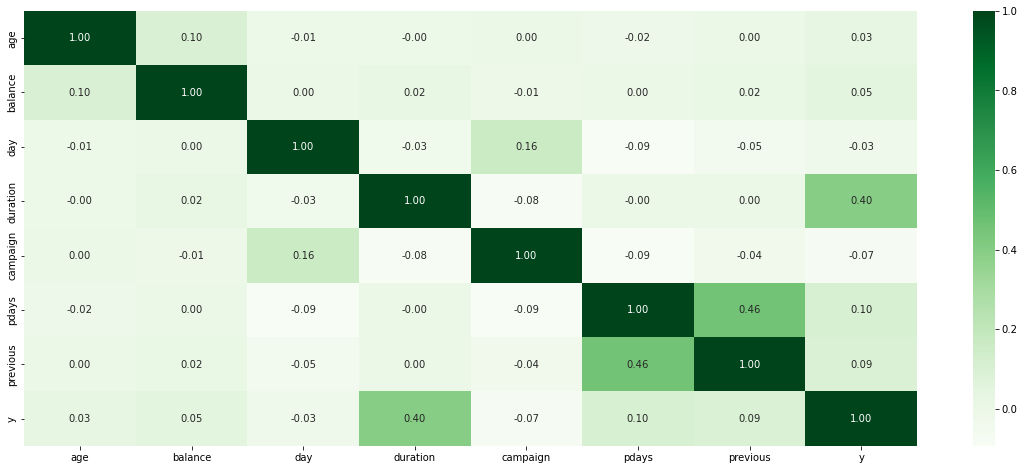

In [25]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt='.2f')
plt.show()

*Headmap Insight :*

- Tidak ada korelasi antar fitur non target.
- Terdapat korelasi positif yang bersifat moderat antara fitur "duration" dengan "y" sebagai target
- Tidak terdapat fitur yang redundan.

**Pair Plots**

<Figure size 1080x1080 with 0 Axes>

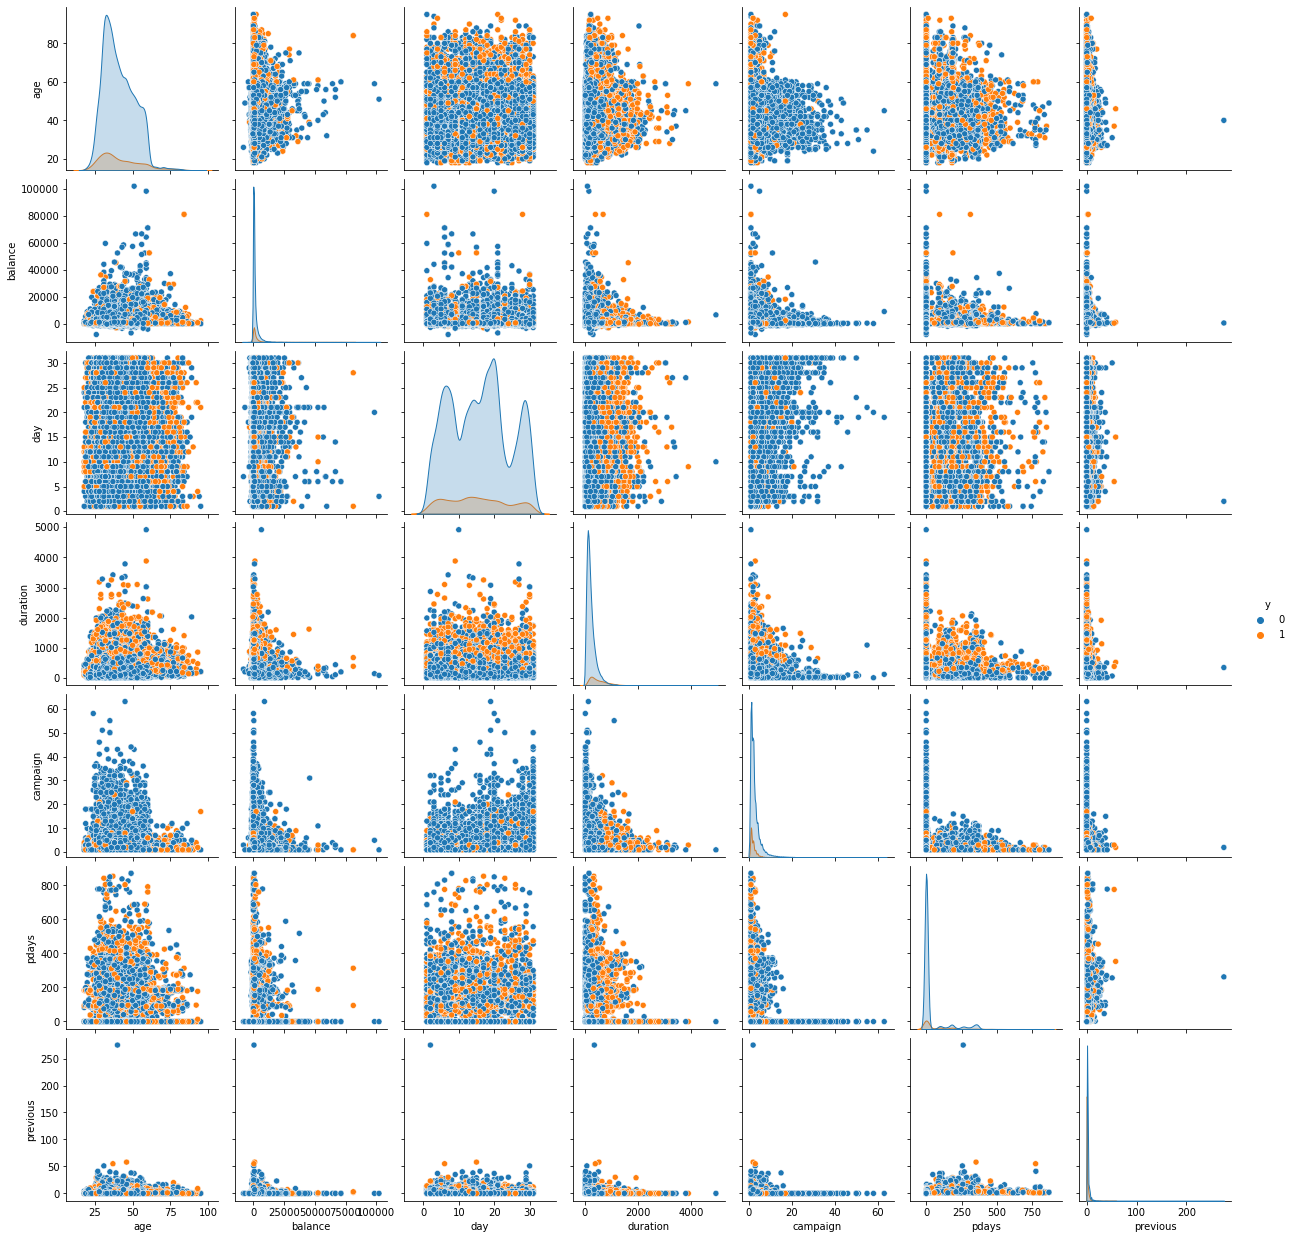

In [26]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='y')

Tidak terdapat pola yang unik, jelas dan terpisah pada pair plot.

**Visualizatoin and Insight**

**- Job**

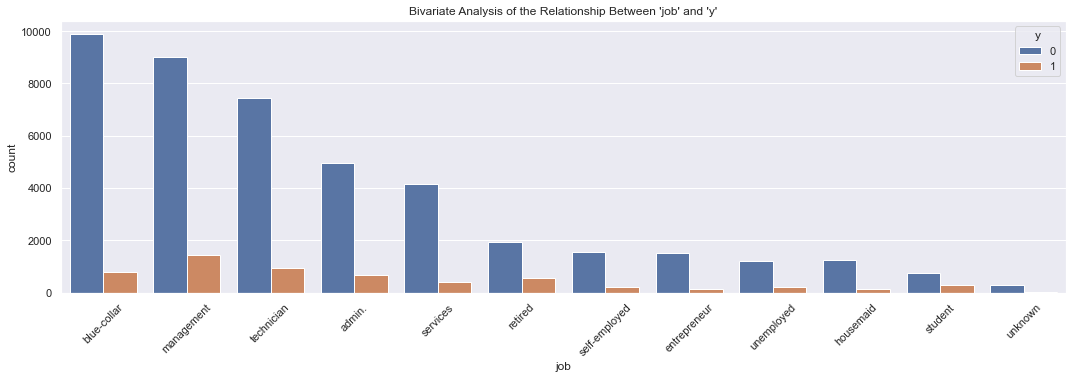

In [27]:
sns.set(rc = {'figure.figsize':(18, 5)})
job = sns.countplot(x="job", data = df, hue = "y", order = df["job"].value_counts().index)
job.tick_params(axis='x', rotation=45)
plt.title("Bivariate Analysis of the Relationship Between 'job' and 'y'")
plt.show()

Bank cenderung lebih tertarik untuk menghubungi nasabah yang memiliki profesi profesional seperti blue collar, management dan teknisi. Profesi management merupakan profesi yang paling banyak berminat untuk menggunakan produk deposito berjangka diikuti oleh profesi teknisi dan blue collar.

**- Marital Status**

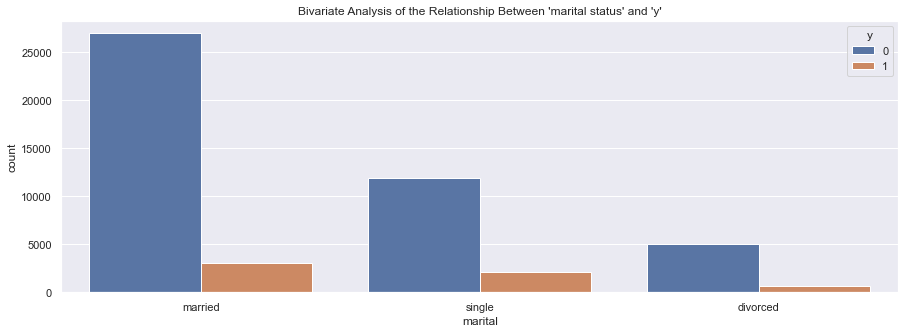

In [28]:
sns.set(rc = {'figure.figsize':(15, 5)})
job = sns.countplot(x="marital", data = df, hue = "y", order = df["marital"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'marital status' and 'y'")
plt.show()

Nasabah yang berstatus menikah lebih sering dihubungi bank dan menggunakan menggunakan produk deposito dibanginkan nasabah yang berstatus sendiri dan bercerai.

**- Education**

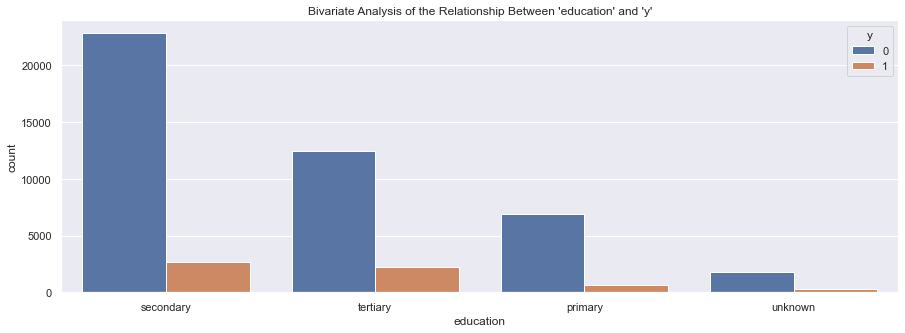

In [29]:
sns.set(rc = {'figure.figsize':(15, 5)})
job = sns.countplot(x="education", data = df, hue = "y", order = df["education"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'education' and 'y'")
plt.show()

Nasabah dengan tingkat pendidikan secondary merupakah nasabah yang paling banyak menggunakan produk deposito. Hal ini menjadi wajar karena jika dilihat dari jumlah nasabah berpendidikan secondary yang dihubungi oleh bank, jumlahnya 2 kali lipat dibandingkan tertiary dan 3 kali lipat dibandingkan primary.

**- Default**

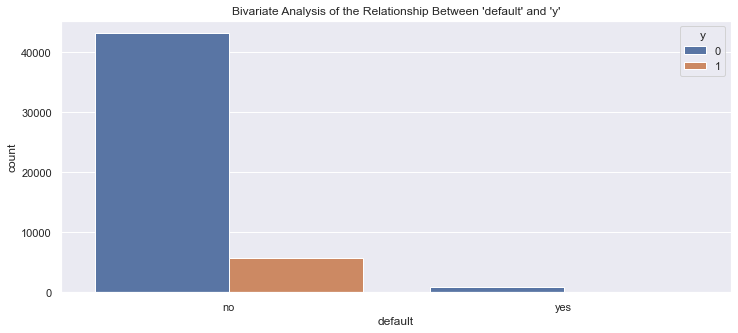

In [30]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(12, 5)})
job = sns.countplot(x="default", data = df, hue = "y", order = df["default"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'default' and 'y'")
plt.show()

Kebanyakan nasabah yang yang berminat menggunakan deposito adalah non-defaulter. Sedangkan nasabah yang memiliki kredit tidak berminat menolak untuk menggunakan deposito.

**- Housing**

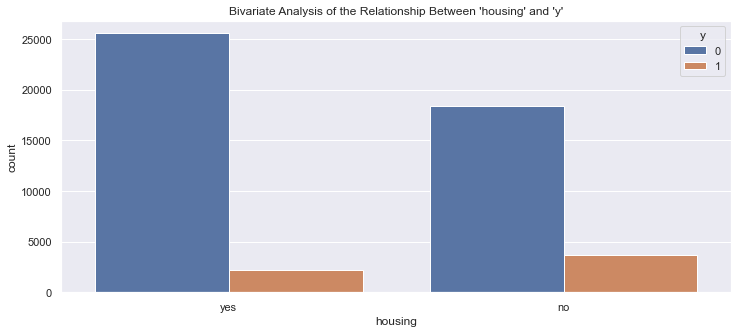

In [31]:
sns.set(rc = {'figure.figsize':(12, 5)})
job = sns.countplot(x="housing", data = df, hue = "y", order = df["housing"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'housing' and 'y'")
plt.show()

Jumlah nasabah dengan pinjaman perumahan yang dihubungi lebih tinggi dibandingkan nasabah yang tidak menggunakan pinjaman perumahan. Namun nasabah yang tidak memiliki pinjaman perumahan lebih berminat untuk menggunakan produk deposito.

**- Loan**

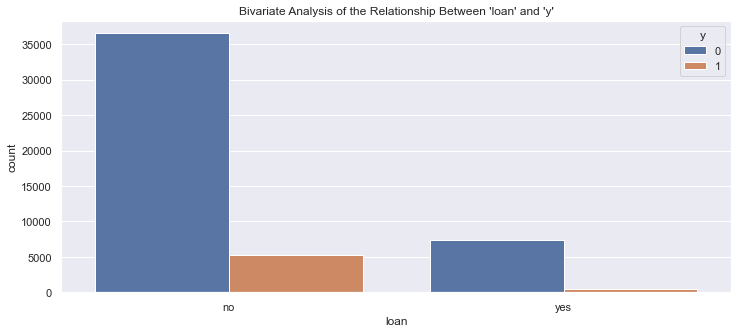

In [32]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(12, 5)})
job = sns.countplot(x="loan", data = df, hue = "y", order = df["loan"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'loan' and 'y'")
plt.show()

Nasabah yang tidak menggunakan produk pinjaman lebih banyak setuju untuk menggunakan produk deposito. Sedangkan nasabah yang memiliki pinjaman lebih sedikit. Hal ini mengindikasikan bahwa konsentrasi perencanaan keuangan nasabah dengan pinjaman adalah membayar cicilan pinjaman dibandingkan menabung di deposito berjangka.

**- Contact**

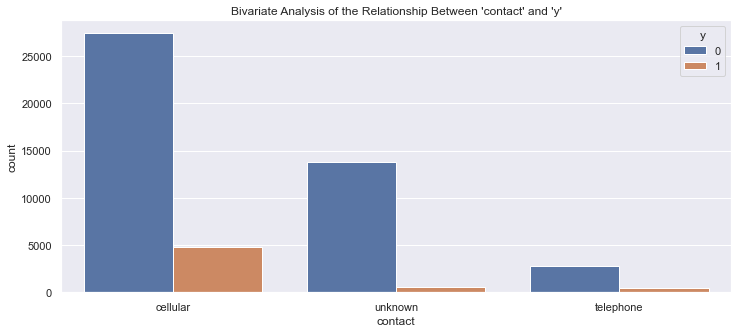

In [33]:
sns.set(rc = {'figure.figsize':(12, 5)})
job = sns.countplot(x="contact", data = df, hue = "y", order = df["contact"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'contact' and 'y'")
plt.show()

Kebanyakan nasabah dihubungi via telepon seluler. Nasabah yang dihubungi menggunakan telepon seluler lebih banyak menggunakan produk deposito dibandingkan dengan metode telekomunikasi lain.

**- Month**

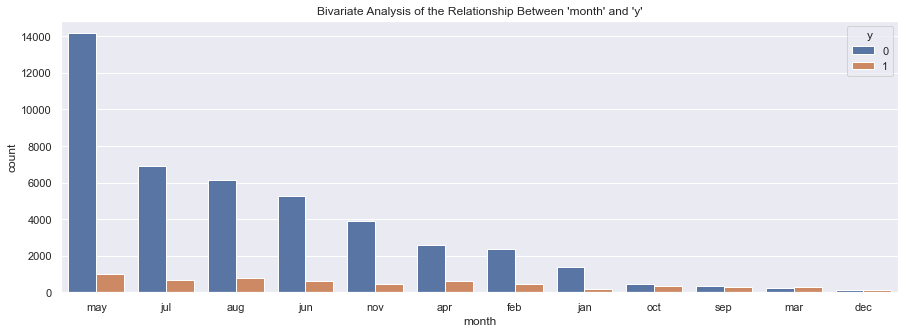

In [34]:
sns.set(rc = {'figure.figsize':(15, 5)})
job = sns.countplot(x="month", data = df, hue = "y", order = df["month"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'month' and 'y'")
plt.show()

Pada bulan mei bank lebih banyak menghubungi nasabah dibandingkan bulan lainnya, namun secara konversi terlihat setiap bulan cenderung rata (flat). Sedangkan pada bulan desember adalah bulan dimana tingkat konbversi nasabah dan intensitas kampanye paling rendah.
Hal ini mengidentifikasi bahwa seara garis besar bulan tidak terlalu berpengaruh terhadap konversi nasabah dan berapapun banyaknya bank menghubungi nasabah tingkat konversi cenderung flat.

**- Previous Campaign Outcome**

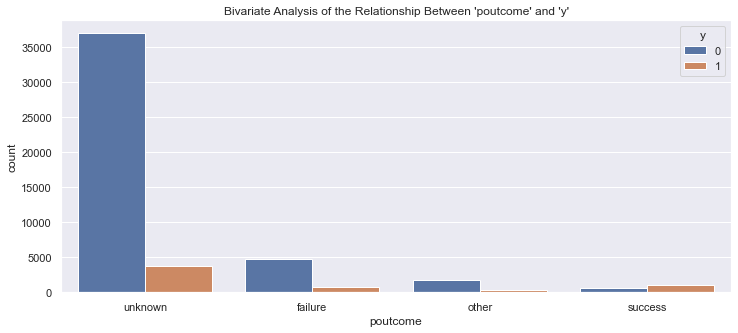

In [35]:
sns.set(rc = {'figure.figsize':(12, 5)})
job = sns.countplot(x="poutcome", data = df, hue = "y", order = df["poutcome"].value_counts().index)
job.tick_params(axis='x')
plt.title("Bivariate Analysis of the Relationship Between 'poutcome' and 'y'")
plt.show()

Pada grafik previous outcome, terlihat unknown memiliki jumlah paling tinggi. Yang artinya konsumen yang pernah dikontak tidak mengetahui tentang kampanye yang dilakukan bank sebelumnya.

**- Y as Target Output**

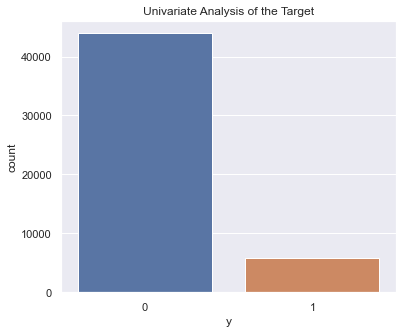

In [36]:
sns.set(rc = {'figure.figsize':(6, 5)})
target = sns.countplot(x="y", data = df, order = df["y"].value_counts().index)
target.tick_params(axis='x')
plt.title("Univariate Analysis of the Target")
plt.show()

Kebanyak nasabah yang dihubungi tidak berminat pada produk deposito berjangka. Pada grafik terlihat selisih yang cukup jauh antara 0 (no) dan 1 (yes), hal ini mengakibatkan masalah class imbalanced dan membutuhkan penanganan pada saat data pre-processing agar model ML tidak terlalu berfokus pada "no".

**Distribution Plot of Feature (with Mean, Median & Modus) vs Boxplot of Y**

**- Age**

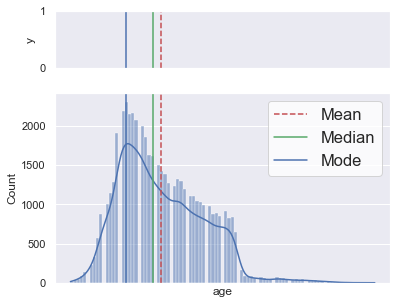

In [37]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.5, style='whitegrid')
mean = df['age'].mean()
median = df['age'].median()
mode = df['age'].mode().values[0]

age = sns.boxplot(data=df, x="age", y="y", ax=ax_box, order = df["y"].value_counts().index)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="age", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

Mayoritas nasabah adalah umur 30 - 50 tahun. Pada displot terlihat distribusi data sedikit ke kiri (left-skewed).

**- Balance**

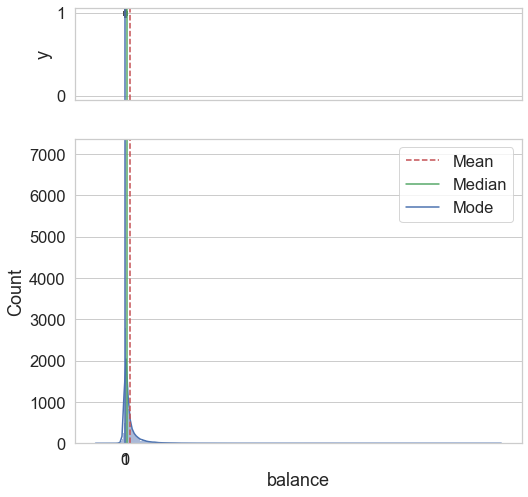

In [38]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.5, style='whitegrid')
mean = df['balance'].mean()
median = df['balance'].median()
mode = df['balance'].mode().values[0]

age = sns.boxplot(data=df, x="balance", y="y", ax=ax_box, order = df["y"].value_counts().index)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="balance", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

- Nilai mean, median dan modus berada sangat dekat bahwan tepat pada angka 0, artinya rata-rata nasabah yang dihubungi memiliki saldo 0 euro pada akun bank mereka.

- Pada grafik boxplot fitur target terlihat bahwa nasabah yang setuju (yes) menggunakan deposito memiliki saldo bank nilainya lebih besar dari modus dan media.

**- Day**

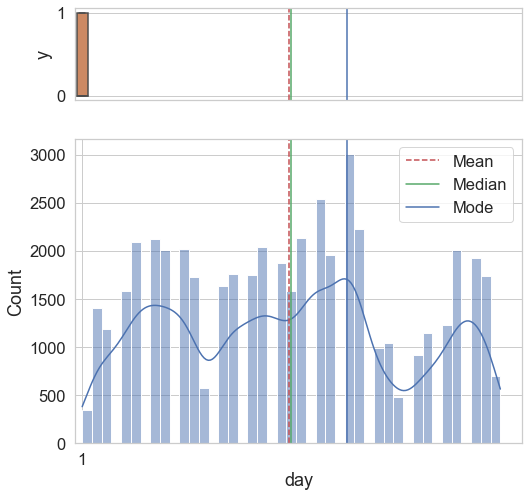

In [39]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.5, style='whitegrid')
mean = df['day'].mean()
median = df['day'].median()
mode = df['day'].mode().values[0]

age = sns.boxplot(data=df, x="day", y="y", ax=ax_box, order = df["y"].value_counts().index)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="day", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

Pada tanggal 20 adalah puncak banyaknya kampanye telepon yang dilakukan oleh bank. Sedangkan pada grafik boxplot, terlihat bahwa nasabah setuju (yes) menggunakan deposito pada tanggal berapapun setiap bulan.

**- Duration**

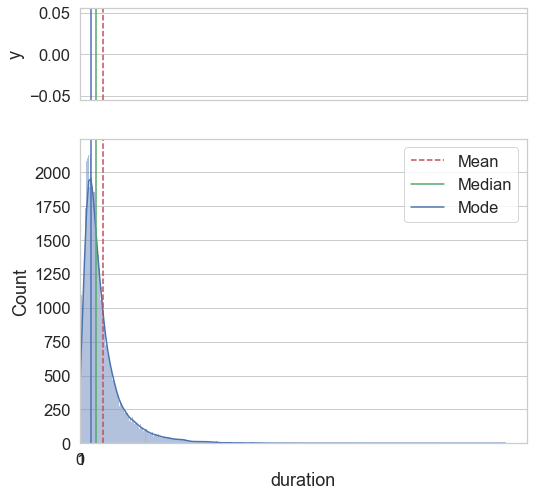

In [40]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.5, style='whitegrid')
mean = df['duration'].mean()
median = df['duration'].median()
mode = df['duration'].mode().values[0]

age = sns.boxplot(data=df, x="duration", y="y", ax=ax_box, order = df["y"].value_counts().index)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="duration", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

- Nasabah umunya menolak tawaran untuk menggunakan deposito bank pada 3 menit pertama.
- Sedangkan nasabah yang bersedia menggunakan deposito membutuhkan waktu lebih dari 3 menit (sekitar 3-13 menit) untuk mempertimbangkan dan setuju.

**- Campaign**

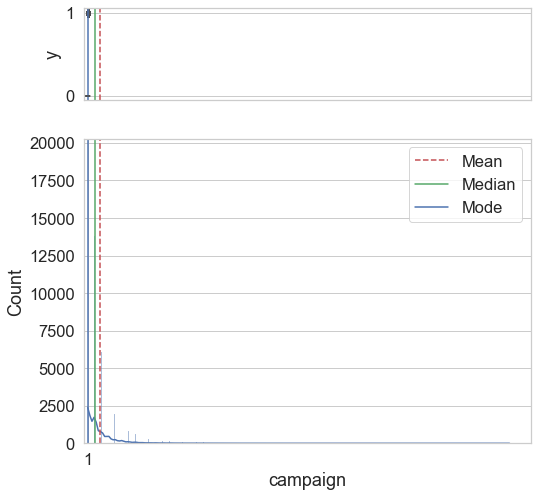

In [41]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.5, style='whitegrid')
mean = df['campaign'].mean()
median = df['campaign'].median()
mode = df['campaign'].mode().values[0]

age = sns.boxplot(data=df, x="campaign", y="y", ax=ax_box, order = df["y"].value_counts().index)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="campaign", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

Baik nasabah menerima maupun menolak menggunakan produk deposito bank membutuhkan jumlah kampanye yang sama, yaitu 3 kali. Yang artinya menghubungi nasabah terlalu banyak akan membuang waktu dan meningkatkan tagihan biaya call center.

**- Pdays**

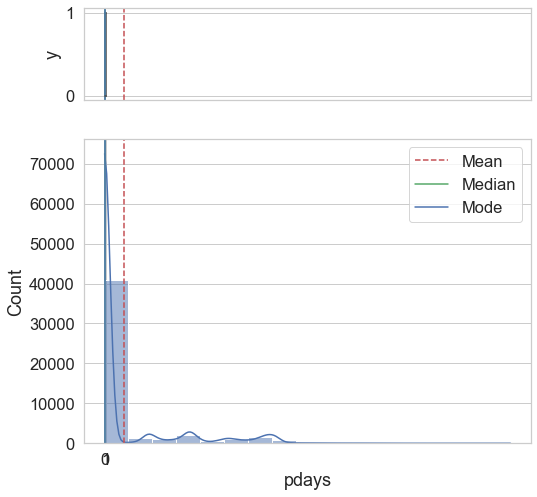

In [42]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.5, style='whitegrid')
mean = df['pdays'].mean()
median = df['pdays'].median()
mode = df['pdays'].mode().values[0]

age = sns.boxplot(data=df, x="pdays", y="y", ax=ax_box, order = df["y"].value_counts().index)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="pdays", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

Pada grafik diatas terlihat bahwa sebagaian besar nasabah baru dihubungi pertama kali, hal ini terlihat dari garis horizontal modus yang berada diawal histogram.

**- Previous**

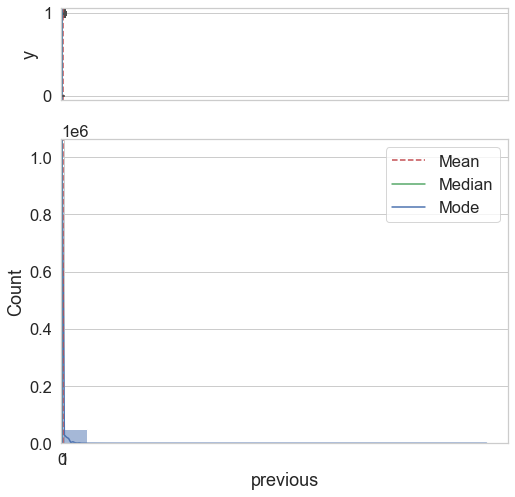

In [43]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.5, style='whitegrid')
mean = df['previous'].mean()
median = df['previous'].median()
mode = df['previous'].mode().values[0]

age = sns.boxplot(data=df, x="previous", y="y", ax=ax_box, order = df["y"].value_counts().index)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="previous", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

Pada grafik diatas, tidak terlihat adanya relasi dan distribusi antara fitur previous dengan target output(y).